# Import librairies

In [502]:
import requests
import tweepy
import webbrowser
import time
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Import keys

In [2]:
from raw_data import keys

In [3]:
twitter_api_key = keys.twitter_api_key()
twitter_api_secret_key = keys.twitter_api_key_secret()
twitter_bearer_token = keys.twitter_bearer_token

# Connect my developer project to my twitter profile

In [4]:
callback_uri = "oob" # url
auth = tweepy.OAuthHandler(twitter_api_key, twitter_api_secret_key, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=BXSf8AAAAAABUe3MAAABfG5g7x0


In [5]:
m=

SyntaxError: invalid syntax (1928120398.py, line 1)

In [ ]:
# webbrowser.open(redirect_url)

In [6]:
user_pin_value = '4532457'
auth.get_access_token(user_pin_value)
api = tweepy.API(auth)

In [ ]:
# print(auth.access_token, auth.access_token_secret)

# Exploration

## Generate IDs

In [ ]:
# url = "https://api.twitter.com/1.1/friends/ids.json?screen_name=alecoursonnois"
# response = requests.get(url, headers={'Authorization': f'Bearer {twitter_bearer_token}'})
# ids = response.json()

In [ ]:
# ids

In [ ]:
# ids_list = ids["ids"]

In [ ]:
# len(ids_list)

In [ ]:
# ids_list

## Generate tweets from IDs

In [ ]:
# ids_list[2]

In [ ]:
# counter = 1
# for id in ids_list:
#     url = f"https://api.twitter.com/2/tweets/{id}?expansions=author_id,attachments.poll_ids"
#     response = requests.get(url, headers={'Authorization': 'Bearer {twitter_bearer_token}'})
#     last_tweet_per_id = response.json()
#     print(f"{counter} : {id} : {last_tweet_per_id}")
#     print("---------------------------")
#     counter += 1

In [ ]:
# url = "https://api.twitter.com/2/tweets/1446733333170380811"
# response = requests.get(url, headers={'Authorization': 'Bearer {twitter_bearer_token}'})
# extracted_tweet = response.json()
# extracted_tweet["data"]["text"]

In [ ]:
# extracted_tweet

## Build the main function to extract tweets from a timeline

url tuto : https://www.youtube.com/watch?v=dvAurfBB6Jk

In [ ]:
# api_attributes = dir(api)
# api_attributes

In [ ]:
# my_timeline = api.home_timeline()

In [ ]:
## Extract status from my_timeline

# for status in my_timeline:
#     print(status.text)

In [ ]:
## First step from the video

# columns = set()
# allowed_types = [str, int]
# tweets_data = []

# for status in my_timeline:
# #     print(vars(status))
# #     print('-----------------------------')
# #     print(status.user.screen_name)
#     status_dict = dict(vars(status))
#     keys = vars(status).keys()
#     single_tweet_data = {"user":status.user.screen_name, "author": status.author.screen_name}
#     for k in keys:
# #         print(k)
#         v_type = type(status_dict[k])
#         if v_type in allowed_types:
#             single_tweet_data[k] = status_dict[k]
#             columns.add(k)
#     tweets_data.append(single_tweet_data)
    
# headers_cols = list(columns)
# headers_cols.append("user")
# headers_cols.append("author")

In [ ]:
## Generate a df from the code above
# df = pd.DataFrame(tweets_data, columns = headers_cols)

In [ ]:
# df.shape

In [ ]:
# df.head()

In [ ]:
## Write a first function to automatically extract tweets from my timeline

# def extract_timeline_as_df(user_name):
#     columns = set()
#     allowed_types = [str, int]
#     tweets_data = []
#     if user_name == "alecoursonnois":
#         timeline_list = api.home_timeline()
#     else:
#         timeline_list = api.get_user(screen_name=user_name).timeline()
    
#     for status in timeline_list:
#         status_dict = dict(vars(status))
#         keys = vars(status).keys()
#         single_tweet_data = {"user":status.user.screen_name, "author": status.author.screen_name}
#         for k in keys:
#             v_type = type(status_dict[k])
#             if v_type in allowed_types:
#                 single_tweet_data[k] = status_dict[k]
#                 columns.add(k)
#         tweets_data.append(single_tweet_data)

#     headers_cols = list(columns)
#     headers_cols.append("user")
#     headers_cols.append("author")
    
#     df = pd.DataFrame(tweets_data, columns = headers_cols)
    
#     return df

## Apply the function to extract tweets from a timeline

### My timeline

In [ ]:
# df2 = extract_timeline_as_df(user_name="alecoursonnois")
# df2.head()

### Another user's timeline

In [ ]:
# df3 = extract_timeline_as_df(user_name="MLP_officiel")
# df3.head()

In [ ]:
# df4 = extract_timeline_as_df(user_name="Anne_Hidalgo")
# print(df4.shape)
# df4.head()

## Get tweets with ids using tweepy

In [ ]:
# status_obj = api.get_status("1446730042839650311")

In [ ]:
# status_obj.text

## Get id with user_name

In [ ]:
# user = api.get_user(screen_name="Anne_Hidalgo")
# user_timeline = user.timeline()
# user_id = user_timeline[0].id
# user_id

## Number of friends by user's screen_name

In [ ]:
# me = api.get_user(screen_name="alecoursonnois")
# me.friends_count

## Get the screen_name of politics that I follow

In [ ]:
# my_friends = me.friends(count=100)
# personal_friends = ["Baly_5", "LucieCMP", "JeannonoSmith", "Seezzy_"]
# politics_screen_name = []

# for friend in my_friends:
#     friend_name = friend.screen_name
#     if friend_name in personal_friends:
#         pass
#     else:
#         politics_screen_name.append(friend_name)

# print(f"I follow {len(politics_screen_name)} politics")
# politics_screen_name

# Load new content

## Function to extract the tweets of politicals that I follow

In [7]:
def extract_tweets_from_politics(number_of_tweet_per_politic):
    """This function return a DataFrame of the last tweets of politics that I follow on Twitter"""
    
    # Start by working on my own account
    me = api.get_user(screen_name="alecoursonnois")
    # Generate a list of my all of my friends (considering that I have under 200 friends on twitter)
    my_friends = me.friends(count=200)
    
    # Retrieve my personal friends which I don't want to analyze their tweets
    not_politics = ["alecoursonnois", "Baly_5", "LucieCMP", "JeannonoSmith", "Seezzy_"]
    
    # Create a set to stock the DataFrame columns names
    columns = set()
    # Create a list to restrict the extractions to string and int datas only
    allowed_types = [str, int]
    # Create a list to save each tweet and its datas
    tweets_data = []
    # Create to save politics screen_names
    politics_screen_name = []
    
    # Iterate on my_friends
    for friend in my_friends:
        friend_name = friend.screen_name
        
        # Don't act if this friend is out of the project
        if friend_name in not_politics:
            pass
        
        else:
            # Generate politics timeline list of the last tweets (the number must be indicated as a function's argument)
            timeline_list = api.get_user(screen_name=friend_name).timeline(count=number_of_tweet_per_politic)
            
            # Iterate on each tweet
            for status in timeline_list:
                # Generate a dictionary of status attributes
                status_dict = dict(vars(status))
                
                # From this dictionary, get the keys and stock it in a variable
                keys = vars(status).keys()
                
                # Create a dictionary stocking each status of the politic we are working on
                # Integrate the status user_screen_name and its author_screen_name
                # This dictionary will be added to the "tweets_data" list and finaly convert into a DataFrame
                single_tweet_data = {"user":status.user.screen_name, "author": status.author.screen_name}
               
                # Iterate on each status key (future column name)
                for k in keys:
                    # Check its type
                    v_type = type(status_dict[k])
                    
                    # If its in the allowed_types list there we go
                    if v_type in allowed_types:
                        # Add the status data to its right key into the dictionary of each status
                        single_tweet_data[k] = status_dict[k]
                        # Add the key as a column name in the set
                        columns.add(k)
                
                # Append the full single_tweet_data dictionary with the right key to the tweets_data list
                tweets_data.append(single_tweet_data)

    # Give a name to the columns respecting the order
    headers_cols = list(columns)
    # Add user and author column names
    headers_cols.append("user")
    headers_cols.append("author")

    # Convert the tweets_data list into a DataFrame
    df = pd.DataFrame(tweets_data)
    
    # Only keep columns that provides information
    columns_to_keep = ['user', 'author', 'id', 'text', 'source', 'source_url']
    df = df[columns_to_keep]
    
    return df

## Apply the function

In [48]:
last_tweets_df = extract_tweets_from_politics(number_of_tweet_per_politic=500)

In [51]:
last_tweets_df.shape

(5100, 6)

In [52]:
last_tweets_df.head()

,user,author,id,text,source,source_url
0,EPhilippe_LH,EPhilippe_LH,1446811916698103814,En avant toute ! #Horizons https://t.co/kyedVD...,Twitter for iPhone,http://twitter.com/download/iphone
1,EPhilippe_LH,EPhilippe_LH,1446773154693718017,Voir loin pour faire bien : c’est ce que mérit...,Twitter for iPhone,http://twitter.com/download/iphone
2,EPhilippe_LH,EPhilippe_LH,1444968484002205704,Voir loin pour faire bien. \nDépasser le court...,Twitter for iPhone,http://twitter.com/download/iphone
3,EPhilippe_LH,EPhilippe_LH,1438943519356370944,RT @jennydemay: Sans filtre.Sans maquillage\nC...,Twitter for iPhone,http://twitter.com/download/iphone
4,EPhilippe_LH,EPhilippe_LH,1437400286247755778,Soutien républicain et amical à @MA_Jamet et à...,Twitter for iPhone,http://twitter.com/download/iphone


## Check the number of tweets per politics

In [53]:
last_tweets_df["user"].value_counts()

EPhilippe_LH      200
ZemmourEric       200
UPR_Asselineau    200
MichelBarnier     200
xavierbertrand    200
ECiotti           200
dupontaignan      200
gerardfiloche     200
Anne_Hidalgo      200
yjadot            200
philippejuvin     200
larrouturou       200
jeanlassalle      200
SLeFoll           200
MLP_officiel      200
JLMelenchon       200
montebourg        200
DenisPayre        200
vpecresse         200
f_philippot       200
jfpoisson78       200
PhilippePoutou    200
Fabien_Roussel    200
EmmanuelMacron    200
n_arthaud         200
Waechter2022      100
Name: user, dtype: int64

## Add it to the main global DataFrame

### Load the global_df 
- and drop the last index column automatically named "Unamed: 0" when saving df to csv file

In [54]:
global_df = pd.read_csv("global_df.csv")
global_df = global_df.drop(columns="Unnamed: 0")

### Add new content

In [55]:
print(global_df.shape)
actual_number_of_tweets = global_df.shape[0]

(5100, 6)


In [59]:
global_df = global_df.append(last_tweets_df, ignore_index=True)

In [60]:
global_df = global_df.drop_duplicates()

In [61]:
print(global_df.shape)
print(f"We just added {global_df.shape[0]-actual_number_of_tweets} tweets to our global_df")

(5389, 6)
We just added 289 tweets to our global_df


In [62]:
global_df.head()

,user,author,id,text,source,source_url
0,EPhilippe_LH,EPhilippe_LH,1446811916698103814,En avant toute ! #Horizons https://t.co/kyedVD...,Twitter for iPhone,http://twitter.com/download/iphone
1,EPhilippe_LH,EPhilippe_LH,1446773154693718017,Voir loin pour faire bien : c’est ce que mérit...,Twitter for iPhone,http://twitter.com/download/iphone
2,EPhilippe_LH,EPhilippe_LH,1444968484002205704,Voir loin pour faire bien. \nDépasser le court...,Twitter for iPhone,http://twitter.com/download/iphone
3,EPhilippe_LH,EPhilippe_LH,1438943519356370944,RT @jennydemay: Sans filtre.Sans maquillage\nC...,Twitter for iPhone,http://twitter.com/download/iphone
4,EPhilippe_LH,EPhilippe_LH,1437400286247755778,Soutien républicain et amical à @MA_Jamet et à...,Twitter for iPhone,http://twitter.com/download/iphone


### Save the new global_df

In [63]:
global_df.shape

(5389, 6)

In [64]:
global_df.to_csv("global_df.csv")

# Clean tweets

## Make a new df from the global one
- This way we will be allowed to drop duplicates next time we will load the global_df from the csv file

In [416]:
df_ready_for_nlp = global_df.copy()

## Retrieve recurrent regex

### Retweets

In [417]:
def retrieve_rt_retweets(df):
    new_texts = []
    
    for text in df["text"]:
        if text[:3] == 'RT ' or text[:3] == 'rt ':
            new_texts.append(text[3:])
        else:
            new_texts.append(text)
    
    df["text"] = new_texts
    
    return df

- Show a text that contains this regex:

In [418]:
retweet_text = df_ready_for_nlp[df_ready_for_nlp["text"].str.contains("rt ")]["text"].iloc[1]
retweet_text

"RT @Thom_astro: Camaïeu de bleu dans les eaux du port du Havre. L'estuaire de la Seine est plus facile à repérer que sa source ! 🔴🦁🦁 Avec s…"

- Check its index

In [419]:
retweet_text_index = df_ready_for_nlp[df_ready_for_nlp["text"]==retweet_text].index[0]
retweet_text_index

28

- Apply the function:

In [420]:
df_ready_for_nlp = retrieve_rt_retweets(df_ready_for_nlp)

- Check if the text that contained this regex still appears:

In [421]:
retweet_text_cleaned = df_ready_for_nlp.iloc[retweet_text_index]["text"]
retweet_text_cleaned

"@Thom_astro: Camaïeu de bleu dans les eaux du port du Havre. L'estuaire de la Seine est plus facile à repérer que sa source ! 🔴🦁🦁 Avec s…"

### Links

In [422]:
def retrieve_links(df):
    pattern = re.compile("https://*")
    new_text = []

    for text in df["text"]:
        if re.search(pattern, text) is None:
            new_text.append(text)
        else:
            match_position = re.search(pattern, text).span()[0]
            new_text.append(text[:(match_position-1)])

    df["text"] = new_text
    
    return df

- Show a text that contains this regex:

In [423]:
text_with_link = df_ready_for_nlp[df_ready_for_nlp["text"].str.contains("https://")]["text"].iloc[0]
text_with_link

'En avant toute ! #Horizons https://t.co/kyedVDoQI1'

- Check its index

In [424]:
text_with_link_index = df_ready_for_nlp[df_ready_for_nlp["text"]==text_with_link].index[0]
text_with_link_index

0

- Apply the function:

In [425]:
df_ready_for_nlp = retrieve_links(df_ready_for_nlp)

- Check if the text that contained this regex still appears:

In [426]:
text_with_link_cleaned = df_ready_for_nlp.iloc[text_with_link_index]["text"]
text_with_link_cleaned

'En avant toute ! #Horizons'

## Define a text_cleaner function

In [427]:
def text_cleaner(text):
    # Remove Punctuation
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') 
    
    # Lower Case
    lowercased = text.lower() 
    
    # Remove accents
    unaccented_string = unidecode.unidecode(lowercased) 
    
    # Tokenize
    tokenized = word_tokenize(unaccented_string) 
    
    # Remove numbers
    words_only = [word for word in tokenized if word.isalpha()] 
    
    # Make stopword list
    stop_words = set(stopwords.words('french')) 
    
    # Remove Stop Words
    without_stopwords = [word for word in words_only if not word in stop_words]
    
    return " ".join(without_stopwords)

In [428]:
text_cleaner("ça va être un Test!")

'ca va etre test'

## Apply the text_cleaner function

In [429]:
df_ready_for_nlp['text'] = df_ready_for_nlp['text'].apply(text_cleaner)

df_ready_for_nlp['text'].iloc[0]

'avant toute horizons'

# Analyze tweets

## Vectorize the text and estimate the associated weight

In [430]:
# Tuned TFidfvectorizer
vec = TfidfVectorizer(ngram_range = (1,1), min_df=0.01, max_df = 0.05).fit(df_ready_for_nlp["text"])

# Transform text to vectors
vectors = vec.transform(df_ready_for_nlp["text"]) 

# Sum of tfidf weighting by word
sum_tfidf = vectors.sum(axis=0) 

# Get the word and associated weight
tfidf_list = [(word, sum_tfidf[0, idx]) for word, idx in vec.vocabulary_.items()]  

# Sort
sorted_tfidf_list =sorted(tfidf_list, key = lambda x: x[1], reverse=True)  

sorted_tfidf_list[:10]

[('cette', 139.64470130564192),
 ('francais', 136.6166999947003),
 ('merci', 132.34294936965188),
 ('contre', 121.2668402773069),
 ('macron', 115.66231513975703),
 ('ans', 99.43157141845157),
 ('tous', 98.05026099193758),
 ('si', 94.66350397800136),
 ('tout', 94.20097131087093),
 ('fait', 92.24672582038991)]

## Map words weight

- To retrieve once again stopwords but with WordCloud, add after "height":
- stopwords=STOPWORDS

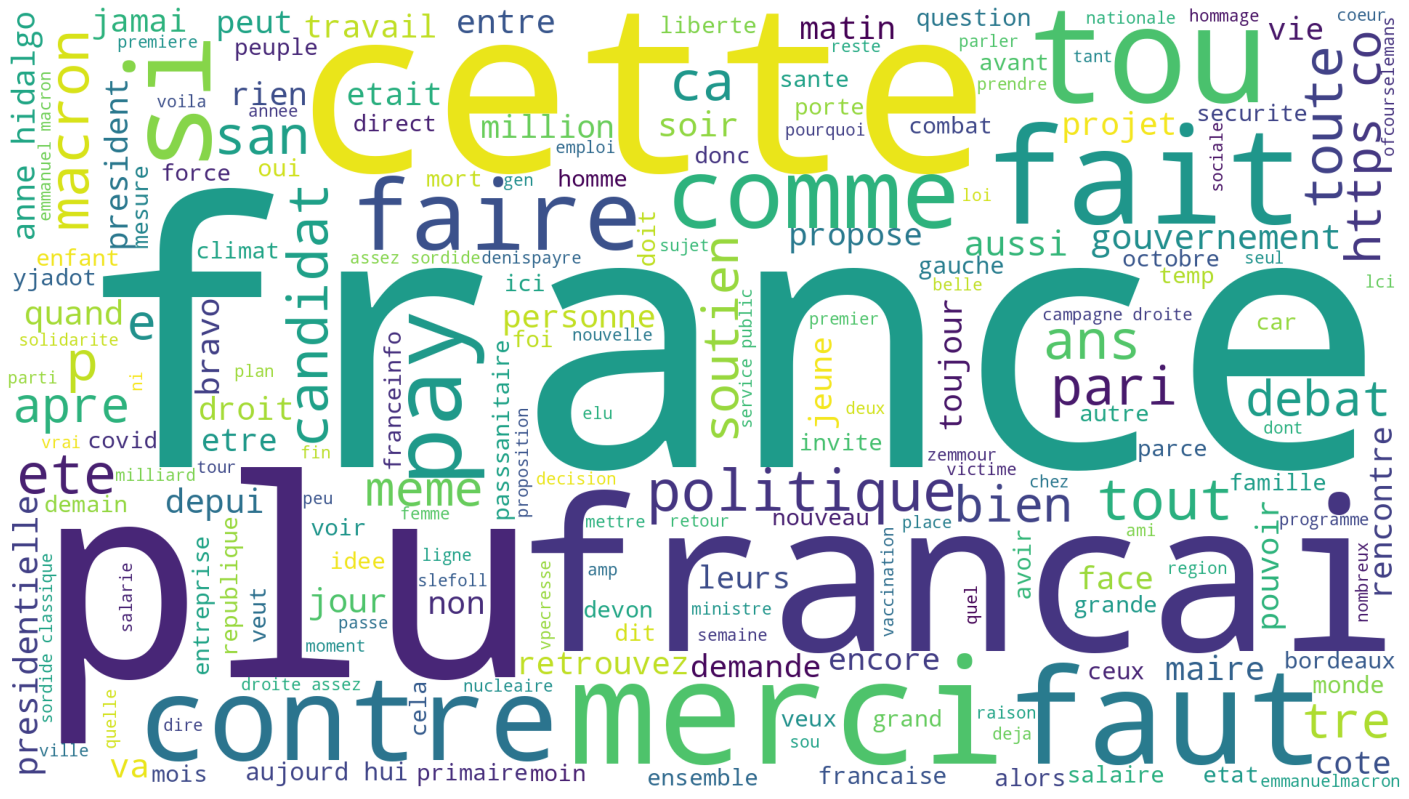

In [431]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white', width=1920, height=1080, stopwords=STOPWORDS).generate(" ".join(df_ready_for_nlp["text"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Count iteration per word

In [432]:
words_iteration = {}

for text in df_ready_for_nlp["text"]:
    tokenized_word = word_tokenize(text)
    for word in tokenized_word:
        if word in words_iteration:
            words_iteration[word] += 1
        else:
            words_iteration[word] = 1

In [433]:
len(words_iteration)

12523

In [434]:
dict(sorted(words_iteration.items(), key=lambda item: item[1], reverse=True))

{'a': 2831,
 'france': 413,
 'plus': 347,
 'cette': 233,
 'francais': 215,
 'contre': 197,
 'merci': 187,
 'macron': 175,
 'tout': 162,
 'ans': 160,
 'tous': 155,
 'fait': 154,
 'si': 153,
 'faire': 148,
 'faut': 148,
 'comme': 139,
 'apres': 136,
 'pays': 135,
 'paris': 129,
 'droite': 128,
 'etre': 124,
 'depuis': 123,
 'e': 122,
 'ca': 118,
 'tres': 116,
 'politique': 115,
 'sans': 106,
 'campagne': 105,
 'ete': 105,
 'co': 105,
 'ceux': 103,
 'candidat': 99,
 'presidentielle': 99,
 'laurenceparisot': 99,
 'soir': 98,
 'soutien': 95,
 'peut': 94,
 'meme': 92,
 'grand': 90,
 'doit': 90,
 'https': 90,
 'quand': 89,
 'bien': 88,
 'gouvernement': 88,
 'va': 87,
 'aussi': 86,
 'president': 85,
 'avoir': 83,
 'entre': 82,
 'retrouvez': 81,
 'debat': 80,
 'rien': 79,
 'demain': 77,
 'projet': 77,
 'p': 76,
 'non': 76,
 'bravo': 75,
 'hidalgo': 75,
 'primaire': 75,
 'direct': 74,
 'matin': 73,
 'monde': 73,
 'anne': 72,
 'face': 72,
 'travail': 71,
 'propose': 71,
 'pouvoir': 70,
 'toutes':

## Work on lexical contents

### Define lexical variables

In [435]:
political_lexicon = """démocratie,politicien,gouvernement,état,diplomatie,fédéralisme,constitution,socialisme,idéologie,économique,économie,libéralisme,régime,pouvoir,social,actualité,citoyen,monarchie,parti,Machiavel,pluralisme,opposition,parlement,stratégie,civique,dictature,gouvernant,machiavélisme,parti politique,réactionnaire,dépolitiser,diplomatique,fascisme,géopolitique,politiser,sionisme,homme d'État,opinion,politologue,progressiste,révolution,révolutionnaire,technocratie,apartheid,écologie,égalité,gauche,indépendance,nationalisme,oligarchie,populisme,réfugié,terrorisme,austérité,révolution,démagogie,polémique,diplomate,philosophe,politisation,grève,libéral,programme,sociologie,souveraineté,système,alliance,anarchie,autocratie,bipolarisation,congrès,opportunisme,politiquement,propagande,schisme,sénat,Union européenne,apolitique,débat,féodalité,impérialisme,leader,militant,parlementaire,politicard,scission,économiste,extrémisme,impérialiste,analyste,centriste,écologiste,immigration,machiavélique,arène,bourgeoisie,communiste,instabilité,mondialisation,pamphlet,science politique,société,culturel,dissidence,européenne,financier,journal,mission,multipartisme,panafricanisme,racisme,anarchisme,civil,crise,électeur,gaullisme,goulag,islamisme,majorité,marxiste,orientation,parti républicain,protectorat,scandale,terreur,transition,utopie,amnistie,coalition,courant,décentralisation,entente,extrémiste,gouvernementale,Mao ZeDong,municipale,philosophie,philosophique,relance,revue,statut,technocrate,bonapartiste,clientélisme,démocratique,religieuse,répression,séparatiste,souverainiste,capitalisme,conduite,conflit,idéologique,isolationnisme,juridique,morales,politologie,publiciste,autarcie,bureaucratie,cléricalisme,colonial,contexte,démocrate,dialogue,gestion,glasnost,institutionnel,politicailler,politicaillerie,stabilité,totalitaire,vie politique,agitation,anticléricalisme,appartenance,autruche,barre,bureau,centre,club,écologisme,éditorial,état-providence,gauchiste,gazette,homme,infléchir,institut,institutions,intégration,keynésianisme,modéré,monarchiste,morale,violence,orthodoxe,panslavisme,pression,prolétariat,province,sécession,tendance,totalitarisme,action,activiste,affaire,constitutionnelle,déflation,échiquier,encarté,extérieure,faction,habile,homme politique,indépendantiste,intérieure,interpellation,interventionnisme,junte,Marine Le Pen,nation,parlementarisme,public,quitter,réaction,religion,social-démocratie,souverainisme,sphère,syndicalisme,tribalisme,troïka,agrarien,ambiant,budgétaire,considérations,convictions,discrimination,droits civils,fédérale,féminisme,finance,Guépéou,intrigues,langue de bois,monétaire,nationalité,nihilisme,réforme,Tchéka,tempête,administrative,ambitions,assemblées,autonomie,classe ouvrière,commerciales,conservateur,conversion,ethnique,fédération,financement,intérêts,littérature,menées,nationale,opposant,personnalités,populiste,protectionniste,querelles,républicain,syndical,affaires publiques,artistiques,démographique,discrimination positive,gouverner,habileté,indépendantisme,négociation,plan,police,politiste,ruse,science,temporisation,Thucydide,abstentionniste,Académie des sciences,accession,activisme,agora,aliénation,ambitieuse,anarchiste,antiparlementaire,autonome,autonomiste"""
political_lexicon = word_tokenize(text_cleaner(political_lexicon))

### Define a function to count each time a twitter user user a word present in a given lexicon

In [468]:
def lexicon_importance_per_user_df(df, lexicon):
    """Return a DataFrame couting each time a twitter user use a word present in a given lexicon"""
    # Define the users
    list_of_users = list(df["user"].unique())
    # Define a list stocking the results per user
    lexicon_per_user_list = []

    for user in list_of_users:
        # Define a DataFrame per user
        users_personnal_df = df[df["user"]==user]
        # Analyze each tweet of each personnal DataFrame created
        for text in users_personnal_df["text"]:
            # Tokenize tweets
            tokenized_word = word_tokenize(text)
            # Iterate over each one of them
            for word in tokenized_word:
                # Check if they are in a certain lexicon
                if word in lexicon:
                    # If it is the case, create a dictionary that stock this information
                    new_row = {"user":user}
                    # If the word is already registered in this new_row count +1
                    if word in new_row:
                        new_row[word] += 1
                    # If it is the first time, only count 1
                    else:
                        new_row[word] = 1
                    # Finaly, append this new_row to the lexic_per_user_list
                    lexicon_per_user_list.append(new_row)
                else:
                    pass
    
    # Generate the DataFrame from the lexicon_per_user_list just created
    lexicon_per_user_df = pd.DataFrame(lexicon_per_user_list)
    # Fillna by 0
    lexicon_per_user_df = lexicon_per_user_df.fillna(0)
    # Groupby and sum the results per user
    lexicon_per_user_df = lexicon_per_user_df.groupby(['user']).sum()
    # Create a "total" column to generate a lexicon_score_per_user
    lexicon_per_user_df["lexicon_score_per_user"] = lexicon_per_user_df.sum(axis=1)
    # Transpose the DataFrame to have the users in column and the words in row
    lexicon_per_user_df_transposed = lexicon_per_user_df.T
    
    return lexicon_per_user_df_transposed

### Apply the function

In [443]:
df_test = lexicon_importance_per_user_df(df=df_ready_for_nlp, lexicon=political_lexicon)
df_test

user,Anne_Hidalgo,DenisPayre,ECiotti,EPhilippe_LH,EmmanuelMacron,Fabien_Roussel,JLMelenchon,MLP_officiel,MichelBarnier,PhilippePoutou,...,gerardfiloche,jeanlassalle,jfpoisson78,larrouturou,montebourg,n_arthaud,philippejuvin,vpecresse,xavierbertrand,yjadot
parti,3.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,...,4.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0
strategie,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
republicain,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
municipale,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
geopolitique,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imperialiste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
nationalisme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
bourgeoisie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
proletariat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Visualize the results

In [527]:
user_score = df_test["Anne_Hidalgo"].sort_values(ascending=False)[0]
user_top_words = df_test["Anne_Hidalgo"].sort_values(ascending=False)[1:]

In [492]:
for word, recurrence_results in user_top_words.items():
    if recurrence_results == 0:
        user_top_words = user_top_words.drop(labels=word)

In [529]:
top_20_user_top_words = user_top_words[:20]

In [530]:
plot_index = list(top_20_user_top_words.index)
plot_values = list(top_20_user_top_words.values)

<AxesSubplot:>

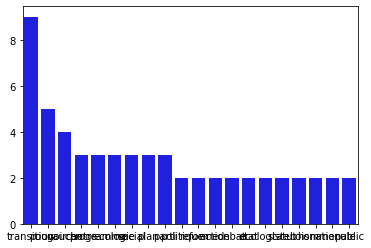

In [531]:
sns.barplot(x=plot_index, y=plot_values, color="b")

([<matplotlib.patches.Wedge at 0x7f5cdcbc41f0>,
 [Text(0.9718632588715465, 0.5152492659437544, 'transition'),
  Text(0.3512317184868798, 1.0424184763945588, 'pouvoir'),
  Text(-0.17796016379071314, 1.0855091801102295, 'gauche'),
  Text(-0.5671092189310352, 0.942542908202821, 'centre'),
  Text(-0.8383782500070551, 0.7121249257785519, 'programme'),
  Text(-1.0218743899910416, 0.40715197541021036, 'ecologie'),
  Text(-1.0983867555967364, 0.059552792794925785, 'social'),
  Text(-1.0599049869019372, -0.29428118991944513, 'plan'),
  Text(-0.9104578812813957, -0.6173057965162747, 'parti'),
  Text(-0.7121248865312325, -0.8383782833440281, 'politique'),
  Text(-0.5152492545697039, -0.971863264901686, 'reforme'),
  Text(-0.2942811403017114, -1.059905000678233, 'action'),
  Text(-0.059552767085328126, -1.0983867569906698, 'debat'),
  Text(0.17796022731115246, -1.0855091696965822, 'etat'),
  Text(0.40715199932890644, -1.0218743804609618, 'ecologiste'),
  Text(0.6173057965162742, -0.910457881281395

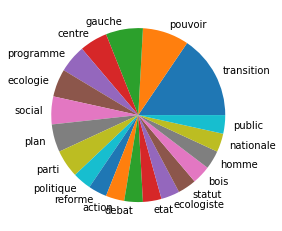

In [532]:
plt.pie(plot_values, labels=plot_index)

### Check the words we let behind

In [ ]:
m=